# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Обзор прошедшего занятия

Что мы делали в классе:

**Задание 1**
* строили деревья
* критерии информативности которых написали даже сами
* визуализировали границы принятия решений в 2d
* и рисовали сами деревья


**Задание 2**
* приняли участие в соревновании на Kaggle, переварив кучу текстовых фичей в численные, проведя кросс-валидацию и сделав сабмит


**Задание 3**
* построили руками несколько метрик качества бинарной классификации


**Задание 4**
* использовали их для оценки классификации разделения статей Ведомостей по топикам

*дополнительно было много приятных ништяков. Например, облако слов, мультипоточность в целях парсинга, удобный инструмент для нахождения правильной css разметки, сохранение моделей в статичные файлы, разделение строк на слова и лемматизация этих слов*

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

In [254]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [128]:
# load already imputed and scaled data
x = pd.read_csv('titanic_x_train.csv')
y = pd.read_csv('titanic_y_train.csv')

In [129]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.0 KB


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
clf = DecisionTreeClassifier()

In [134]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

### playing with GridSearch

In [229]:
from sklearn.model_selection import GridSearchCV
from random import randint
params = {
    "max_depth": [3, None],
    "min_samples_leaf": range(1,4),
    "max_leaf_nodes": range(2,9)
}

In [230]:
gridsearch = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', cv=5)

In [231]:
%%time
gridsearch.fit(X_train, y_train)

Wall time: 1.08 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, None], 'min_samples_leaf': range(1, 4), 'max_leaf_nodes': range(2, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [232]:
gridsearch.best_params_

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1}

In [233]:
gridsearch.best_score_

0.8370786516853933

In [234]:
params_best = gridsearch.best_params_

### Accuracy calculation

In [244]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [236]:
clf = DecisionTreeClassifier(**params_best)

In [237]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [238]:
y_test_pred = clf.predict(X_test)

In [239]:
accuracy_score(y_test, y_test_pred)

0.7877094972067039

In [242]:
precision_score(y_test, y_test_pred)

0.7666666666666667

In [243]:
recall_score(y_test, y_test_pred)

0.6571428571428571

In [245]:
f1_score(y_test, y_test_pred)

0.7076923076923077

### Feature Importances

''

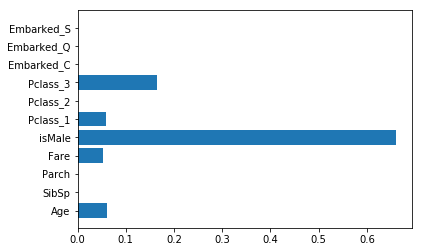

In [261]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(x.columns)),x.columns)
''

### Tree Visualization

In [265]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='titanic_tree.dot', filled=True, feature_names=list(X_train.columns), class_names=X_train.columns)

# def get_tree_dot_view(clf, feature_names=None, class_names=None):
#     print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))


In [269]:
!"c:\Program Files (x86)\Graphviz2.38\bin\dot.exe" -Tpng titanic_tree.dot -o titanic_tree.png

!['titanic_tree'](titanic_tree.png)

### Final prediction for original test dataset

In [247]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [248]:
X_test_imputed_scaled = pd.read_csv('titanic_x_test.csv')

In [249]:
predictions = clf.predict(X_test_imputed_scaled)

In [250]:
test = pd.read_csv('titanic/test.csv')

In [251]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [253]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)